In [17]:
# the pandas module is imported. It will be used to clean and modify the data
# the os module is imported to interact with my system files

import pandas as pd
import os

In [18]:

# the files path are retrieved from the system directories using the parent directory path

cwd = os.path.abspath('C:/Users/cc/Downloads/cyclistic_data/2020_bike_data') 
files = os.listdir(cwd)

In [19]:
print(files)

['202004-divvy-tripdata.csv', '202005-divvy-tripdata.csv', '202006-divvy-tripdata.csv', '202007-divvy-tripdata.csv', '202008-divvy-tripdata.csv', '202009-divvy-tripdata.csv', '202010-divvy-tripdata.csv', '202011-divvy-tripdata.csv', '202012-divvy-tripdata.csv', 'Divvy_Trips_2020_Q1.csv']


In [20]:
newstring = []
for f in files:
    newstring.append(f"{cwd}\{f}")

In [21]:
# one of the files is used to test run the process
# the first 5 rows of this file is printed out for inspection

df = pd.read_csv(r'C:\Users\cc\Downloads\cyclistic_data\2020_bike_data\202005-divvy-tripdata.csv')
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,02668AD35674B983,docked_bike,2020-05-27 10:03:52,2020-05-27 10:16:49,Franklin St & Jackson Blvd,36,Wabash Ave & Grand Ave,199.0,41.8777,-87.6353,41.8915,-87.6268,member
1,7A50CCAF1EDDB28F,docked_bike,2020-05-25 10:47:11,2020-05-25 11:05:40,Clark St & Wrightwood Ave,340,Clark St & Leland Ave,326.0,41.9295,-87.6431,41.9671,-87.6674,casual
2,2FFCDFDB91FE9A52,docked_bike,2020-05-02 14:11:03,2020-05-02 15:48:21,Kedzie Ave & Milwaukee Ave,260,Kedzie Ave & Milwaukee Ave,260.0,41.9296,-87.7079,41.9296,-87.7079,casual
3,58991CF1DB75BA84,docked_bike,2020-05-02 16:25:36,2020-05-02 16:39:28,Clarendon Ave & Leland Ave,251,Lake Shore Dr & Wellington Ave,157.0,41.9680,-87.6500,41.9367,-87.6368,casual
4,A79651EFECC268CD,docked_bike,2020-05-29 12:49:54,2020-05-29 13:27:11,Hermitage Ave & Polk St,261,Halsted St & Archer Ave,206.0,41.8715,-87.6699,41.8472,-87.6468,member


In [22]:
# the csv files are read read and concatenated using the pandas functions 'read_csv' and 'concat'

cyclistic_df = pd.DataFrame()
for file in newstring:
    df = pd.read_csv(file)
    cyclistic_df = pd.concat([cyclistic_df, df], ignore_index=True)

cyclistic_df.head()
    

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [23]:
unique_station = cyclistic_df['start_station_name'].value_counts()
unique_station

Streeter Dr & Grand Ave            35366
Clark St & Elm St                  31970
Theater on the Lake                29609
Lake Shore Dr & Monroe St          29233
Lake Shore Dr & North Blvd         26656
                                   ...  
hubbard_test_lws                       3
Base - 2132 W Hubbard Warehouse        2
S Michigan Ave & E 118th St            1
Western Ave & 104th St                 1
N Clark St & W Elm St                  1
Name: start_station_name, Length: 694, dtype: int64

In [24]:
cyclistic_df['started_at'] = pd.to_datetime(cyclistic_df['started_at'])
cyclistic_df['ended_at'] = pd.to_datetime(cyclistic_df['ended_at'])

In [25]:
cyclistic_df['start_day'] = cyclistic_df['started_at'].dt.day_name()
cyclistic_df['end_day'] = cyclistic_df['ended_at'].dt.day_name()

cyclistic_df['month'] = cyclistic_df['started_at'].dt.month_name()

In [26]:
cyclistic_df = cyclistic_df.drop(['started_day', 'ended_day'], axis = 1)

KeyError: "['started_day', 'ended_day'] not found in axis"

In [ ]:
cyclistic_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,duration,distance_covered,start_day,end_day
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,April,1609.0,3.983226,Sunday,Sunday
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,April,489.0,0.978258,Friday,Friday
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,April,863.0,2.985893,Wednesday,Wednesday
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,April,732.0,2.134752,Tuesday,Tuesday
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,April,3175.0,9.121778,Saturday,Saturday


In [ ]:
cyclistic_df['duration'] = cyclistic_df['ended_at'] - cyclistic_df['started_at']
cyclistic_df['duration'] = cyclistic_df['duration'].astype('timedelta64[s]')

In [ ]:
cyclistic_df.shape

(3228158, 19)

In [ ]:
cyclistic_df = cyclistic_df[cyclistic_df.duration > 0]
cyclistic_df.shape

(3228158, 19)

In [ ]:
cyclistic_df['duration'].groupby(cyclistic_df['member_casual']).mean()

member_casual
casual    2593.393974
member     922.839233
Name: duration, dtype: float64

In [ ]:
# This function is used to convert the lat and long points to distance

import numpy as np

def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [ ]:
cyclistic_df['distance_covered_km'] = haversine_vectorize(cyclistic_df.start_lng,cyclistic_df.start_lat, cyclistic_df.end_lng, cyclistic_df.end_lat)

In [ ]:
no_distance = cyclistic_df[ cyclistic_df.distance_covered_km <= 0]

In [ ]:
no_distance.shape

(0, 20)

In [ ]:
cyclistic_df = cyclistic_df[cyclistic_df.distance_covered_km > 0]

In [ ]:
cyclistic_df.shape
3541683
3228158

(3228158, 20)

In [ ]:
cyclistic_df['distance_covered_km'].groupby(cyclistic_df['member_casual']).mean()

member_casual
casual    2.568861
member    2.316568
Name: distance_covered_km, dtype: float64

In [ ]:
cyclistic_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_day', 'end_day', 'month'],
      dtype='object')

In [ ]:
types_of_bikes = pd.DataFrame({'count' : cyclistic_df[['rideable_type', 'member_casual']].groupby(['member_casual', 'rideable_type']).size()}).reset_index()
types_of_bikes

,member_casual,rideable_type,count
0,casual,classic_bike,9976
1,casual,docked_bike,944515
2,casual,electric_bike,202704
3,member,classic_bike,56468
4,member,docked_bike,1727733
5,member,electric_bike,286762


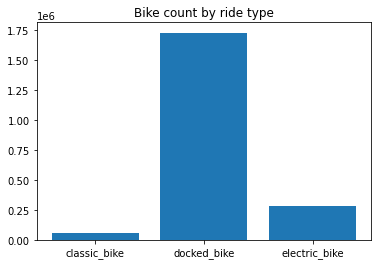

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.title('Bike count by ride type')
plt.bar(types_of_bikes['rideable_type'], types_of_bikes['count'])
plt.show()


In [ ]:
cyclistic_df['start_day'].groupby(cyclistic_df['member_casual']).value_counts()


member_casual  start_day
casual         Saturday     270077
               Sunday       212387
               Friday       174157
               Thursday     138697
               Wednesday    129134
               Monday       117097
               Tuesday      115646
member         Wednesday    314352
               Thursday     313855
               Friday       311132
               Tuesday      300988
               Saturday     296293
               Monday       278763
               Sunday       255580
Name: start_day, dtype: int64

member_casual
casual    2.568861
member    2.316568
Name: distance_covered_km, dtype: float64

In [ ]:
cyclistic_df.to_csv(r'C:\Users\cc\Documents\cleaned_cyclistic_data.csv', index=False)